# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Variables

In [4]:
# Create the dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

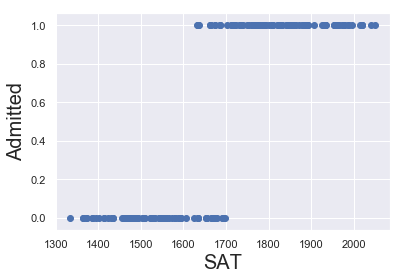

In [5]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a regression line

In [6]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

In [7]:
#Get intercept and coefficients
results_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

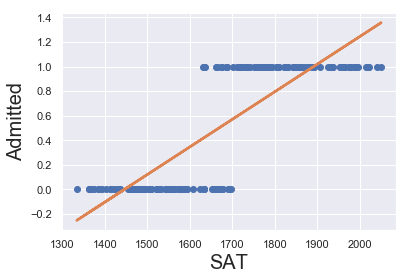

In [8]:
# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C1')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot a logistic regression curve

In [12]:
# Creating a logit regression (we will discuss this shortly)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [13]:
# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

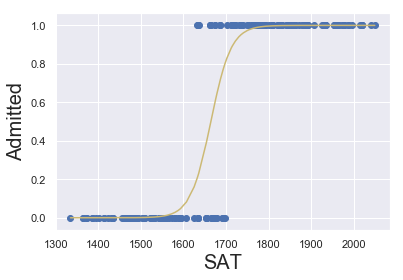

In [14]:
# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

### Time to Focus on Logistic Regression

Till this point, we already have the data loaded, statsmodel logistic model loaded. We move ahead.

Note: Please load the data and seperate the y and x if not done already and fit the regression.

In [15]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Admitted, dtype: int64

In [16]:
x1.head()

0    1363
1    1792
2    1954
3    1653
4    1593
Name: SAT, dtype: int64

In [17]:
#Doing the logistic regression part again. 
#Note that we still need to add the constant for Logistic Reg as well
x = sm.add_constant(x1)
# Creating a logit regression
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


**Explanation of above message:**
- Optimization terminated successfully - This means we managed to fit the regression. 
- It took 10 iterations and the current function value is some number.
- This tells that the statsmodel uses a machine learning algorithm to fit the regression.

The function value shows the value of the objective function at 10th iteration. But why do we need that info ? **Well there is always the possibility that after a certain number of iterations the model won't learn and therefore it cannot optimise th optimization function.**
- In stats model the maximum number of iterations is **35**. After that it'll stop trying and you'll get a message "Maximum number of iterations has been created ......." 

### Summary 

In [18]:
##If you get some kind of error while loading summary, 
##do the following: 
#from scipy import stats
#stats.chisqprob = lambda chisq, df:stats.chi2.sf(chisq, df)

#Why it happened: It seems that stats model is using some 
#function from scipy which is changed or removed from scipy which 
#caused statsmodels to stop working including this one. 
#So we are basically writing the same function that has been removed

In [19]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 May 2019   Pseudo R-squ.:                  0.7992
Time:                        09:48:11   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

***The comment at the end of the Summary Table is for the fact that the model has found the perfect predictor of independent variable Y
More Details at: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/  ***

#### Summary Interpretation

**1. MLE (Maximum Likelyhood Estimation):** 
It is a function which estimates how likely it is that the model at hand describes the real underlying relationships of the variables. In simple words, **The bigger the likelyhood function, the higher the probabiltiy that our model is correct.**

The MLE tries to maximise the likelihood function.
It has iterations as we saw during fitting of the model. The computer goes through different values until it finds a model for which the likelihood is the highest. **When it can no longer optimise it, it'll stop the optimisation**. That is how any machine learning process goes.

**2. Log-likelihood:**
Now that you know what likelihood is, let me tell you that it is much mode convenient to take the **Log-likelihood** when performing MLE. This is the more popular metric.
- The value of Log-likelihood is almost but not always negative.
- **the bigger the value of Log-likelihood the better it is (e.g. log liklihood of -3 is better than -7)**

**3. LL-Null (Log Likelihood - null):**
LL-Null is the log-likelihood of the model which has no independent variables. 
e.g. y0 = b0 * 1
The same y is the dependent variable of the model with the sole independent variable is an arrray of ones. This is the same array of one that we add using add_constants() method.

Let me show you real quick, If we have an array of ones, it should have ll-null equal to our current model.

In [44]:
x0 = np.ones(168)
reg_log1 = sm.Logit(y, x0)
results_log1 = reg_log1.fit()
results_log1.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Fri, 10 May 2019   Pseudo R-squ.:               7.410e-11
Time:                        21:28:50   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

**Here you can see the ll-null is same for both the models** 
But why ? 
 - We compare the log-likelihood of our model with the LL-null, to see of our model has any explanatory power
 - **Basically we check if our model is significant or not**

**4. LLR p-value:**<br>
**For Logistic we have LLR p-value (Log liklihood ratio test p-value) to check for the Logistic model significance**<br>
We had this F-test for Linear Regression to check for the significance of model.<br>

The LLR is based on Log-Likelihood and LL-Null. It measures whether our model is statistically different from LL-null **a.k.a a useless model**<br>

**The lower the p-value (less than 0.05, reject null hypothesis), the more significant is the model**.<br>
Our LLR p-value is very low ~ 0.000. Our model is significant


**5. Pseudo R-squared (McFadden's R-squared):**<br>
Unlike the linear one, there is no such thing as a clearly defined R Squared for the logistic regression. There are several propositions which have a similar meaning to R Squared but none of them is even close to the real deal. <br>
Some terms you may have heard are: <br>
- AIC
- BIC
- McFadden's R-Squared

**What you see in the summary table is McFadden's R-squared**<br>
 - **Good Pseudo R-squared is somewhere between 0.2 and 0.4**<br>
This measure is mostly useful for comparing variations of the same model. Different models will have completely different and incomparable Pseudo R-Squares!

**6. Coefficients Table:**<br>
Logit model for the regression we create is:<br>
log(p/1-p) = -69.9128 + 0.042 * SAT <br>
p = probability of event occuring<br>
1-p = probability of event not occuring<br>
**The ratio of these two is called as 'odds'**<br>

How to interpret the coefficients ?<br>
odds = exp(coefficient)<br>

e.g.: coefficient of SAT = 0.042 <br>
Hence, odds = np.exp(0.042) = 1.042 <br>
**1.042 * 100 = 104.2% <br>
When the SAT score increases by 1 unit, the odds of getting admissions increases by 4.2%**

# Binary Predictions in Logistic Regression

#### We can also include categorigal/dummies along with continuous variables

In [45]:
#Just in case if your stats model fails, do this:
#Apply a fix to the statsmodels library
#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### Load the data

In [47]:
raw_data = pd.read_csv('2.02. Binary predictors.csv')
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [48]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


### Declare the dependent and the independent variables

In [51]:
y = data['Admitted']
x1 = data['Gender']

### Regression

In [52]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.1659
Time:                        22:58:06   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

**Interpreting Results:**<br>
- The model is significant as LLR p-value is less than 0.05
- The gender variable is significant too (less than 0.05)<br>
The model equation is: <br>
log(p/1-p) = -0.6436 + 2.0768 * Gender <br>
np.exp(2.0768) = 7.99327 <br>
**Basically, the chances of getting admission increases by 7.99 times (or 799%) if the person is female, than those of a male**

***We do know that there was a strong relationship between SAT score and admittance. So, lets create a model with both the input variables.***

In [53]:
y2 = data['Admitted']
x2 = data[['SAT','Gender']]

In [54]:
x3 = sm.add_constant(x2)
reg_log2 = sm.Logit(y2,x3)
results_log2 = reg_log2.fit()
results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.8249
Time:                        22:59:19   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Interpreting the Summary**
- Log Likelihood of this one (-20.180) which is better than previous model(-96.140). It makes sense, as SAT was an outstanding predictor.
- We can see that the gender variable is significant (p-value < 0.05) but not as significant as the previous model. <br>
The new coefficient of gender is 1.9449 <br>
np.exp(1.9449) = 6.9929 <br>
***Given the same SAT score, a female is 6.99 times more likely to get admitted than a male *** <br>

So the interpretation: It seems that in this degree or discipline in the university, it is much easier for females to enroll for the course.

### Checking the Accuracy of the model

In [64]:
results_log2.pred_table()

array([[69.,  5.],
       [ 4., 90.]])

#### Formatting the Confusion Matrix

In [69]:
cm_df = pd.DataFrame(results_log2.pred_table())
cm_df

,0,1
0,69.0,5.0
1,4.0,90.0


In [73]:
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df.index = ['Actual 0','Actual 1']
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


**Here is how to read the Confusion Matrix:**<br>
False Positive = Type 1<br>
False Negative = Type 2<br>
***Correct Predictions***<br>
- For 69 observations, the model predicted Zero when the true value was Zero (Called as True Negative , depends on what you call as +ve or -ve)
- For 90 observations, the model predicted One and it actually was One (Called True Positive)<br>
These cells indicated, in how many cases the model did the job well, 69 + 90

***Incorrect Predictions***
- For 4 observations, the model predicted Zero, while the outcome was actually One
- For 5 observations, the model predicted One, while the outcome was actually Zero
**The model got confused for these observations**<br>

***Terms & Definitions of Confusion Matrix***<br>
**1. True positives (TP):** These are cases in which we predicted yes (students gets admitted), and students actually get admitted i.e. 90<br>
**2. True negatives (TN):** These are the cases in which we predicted no (students will not get admitted) and they actually did not get admitted  i.e 69 <br>
**3. False positives (FP):** These are the cases in which we predicted yes (students will get admitted) but they actually do not get admitted. (**Also known as a “Type I error.”**) i.e 5 <br>
**4. False negatives (FN):** These are the cases in which we predicted no (Students will not get admitted), but they actually did get admitted (**Also known as a “Type II error.”**) i.e 4

**There are many Metrics we can calculate using this Confusion Matrix**<br>
**1. Accuracy = (TP+TN)/Total** <br>
Correct Predictions = 69 + 90 = 159 <br>
Incorrect Predictions = 4 + 5 = 9 <br>
Total Predictions = 159 + 9 = 168 <br>

Accuracy = Correct Predictions / Total Predictions = 159/168 = 0.946 = **94.6 % Accuracy** <br>
<br>
You can caculate the accuracy from the table directly as well<br>

In [75]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0] + cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

**2. Sensitivity/Recall = TP/(TP + FN)**<br>
When it’s actually yes, how often does it predict yes? It deals with the actual positive scenerios<br>
recall_train = 90 / 90+4 <br>
**recall_train = 0.9574**

**3. Specificity = TN/(TN + FP)**<br>
When it’s actually no, how often does it predict no? <br>
spec_train = 69 / 69 + 5<br>
**spec_train = 0.9324**

**4. Precision = TP/(TP + FP)**<br> 
When it predicts yes, how often is it correct?<br>
prec_train = 90 / (90 + 5)<br>
**prec_train = 0.9473**

**5. Misclassification Rate = (Misclassified / Total Classifications) = (FP + FN)/(Total)**<br>

This is the opposite of accuracy

**6. F1 Score = 2 * (precision x recall) / (precision + recall)** <br>
It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.<br>
**F1-score = 1 Best (Perfect Precision & Recall)<br>
F1-score = 0 Worst (Worst Precision & Recall)<br>**

- Accuracy and Misclassification rate are opposite of each other
- Recall/Sensitivity & Specificity are opposite of each other


### ROC - We'll see this later

**A ROC(Receiver Operator Characteristic Curve) can help in deciding the best threshold value.**<br> 
- It is generated by plotting the **True Positive Rate (y-axis)** against the **False Positive Rate (x-axis)** as you vary the threshold for assigning observations to a given class.
- ROC curve will always end at (1,1). The threshold at this point will be 0. 
- This means that we will always classify these observations falling into the class 1(Specificity will be 0. False positive rate is 1)<br>
<br>
The area under **ROC is called Area Under the Curve(AUC)**. AUC gives the rate of successful classification by the logistic model

## Predicting - Testing the Model

#### Lets test the model with a new data that it has never seen before


**Load the Dataset**

In [85]:
test = pd.read_csv('2.03. Test dataset.csv')

In [86]:
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


**Map the categorical variables/dummy variables**

In [87]:
test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Female':1,'Male':0})

In [88]:
test.head()

,SAT,Admitted,Gender
0,1323,0,1
1,1725,1,0
2,1762,1,0
3,1777,1,1
4,1665,0,1


**Check if test data is in the same order like train data**<br>
Order is very important because the coefficient of regression will expect it. If we fail to input the correct order, the predictions will be wrong<br>

We used the following model inputs and outputs:<br>
x3 = sm.add_constant(x2)<br>
reg_log2 = sm.Logit(y2,x3)<br>
results_log2 = reg_log2.fit()<br>

In [91]:
x3.head()

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0


In [93]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis=1)

In [94]:
test_data = sm.add_constant(test_data)

In [95]:
test_data.head()

,const,SAT,Gender
0,1.0,1323,1
1,1.0,1725,0
2,1.0,1762,0
3,1.0,1777,1
4,1.0,1665,1


**The order of test input is same as that was used to train the model. If it is not the case then re-order the columns**<br>
Here is the commented code if you need to do it on your own

In [96]:
#test_data = test_data[x.columns.values]

**Predict and Create Matrix**

#### We'll simply create a function that can test the model, return the confusion matrix and accuracy as well

In [98]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # Input features/variables (x_test)
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # Dependent Variable (y_test)
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

**Calling the function with test data**

In [99]:
cnm = confusion_matrix(test_data, test_actual, results_log2)

In [101]:
cnm

(array([[ 4.,  2.],
        [ 2., 11.]]), 0.7894736842105263)

In [102]:
accuracy_model = cnm[1]
accuracy_model

0.7894736842105263

Accuracy of test is 0.7894<br>
Almost always the training accuracy is higher than the test accuracy. That is because of the overfitting.

In [111]:
cnf_mat  = pd.DataFrame(cnm[0])
cnf_mat.columns = ['Predicted 0', 'Predicted 1']
cnf_mat.index = ['Actual 0','Actual 1']
cnf_mat

,Predicted 0,Predicted 1
Actual 0,4.0,2.0
Actual 1,2.0,11.0


**Now calculate the following:**
- 1. TP
- 2. TN
- 3. FP
- 4. FN
- 5. Accuracy
- 6. Misclassification Rate
- 7. Precision
- 8. Recall